In [ ]:
!pip install tensorflow keras numpy mnist matplotlib
from PIL import Image
from pylab import *
import PIL.ImageOps   
from PIL import Image
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf

2250000
(1000, 750, 1)
750000


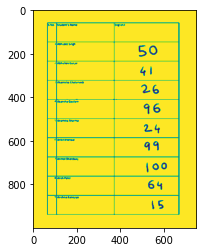

(1000, 750)


In [19]:
#######----------- STEP 1 - CONVERT IMAGE TO PIXELS ----------#########

full=Image.open('video.jpg')
full = full.resize((750,1000))
full.size
full=array(full)
# print(full)
# print(img.shape)
# print(full.size)
print(full.size) #750,1000
if(full.size>=750000):
  full=full[0:1000,0:750,0:1]
print(full.shape)
print(full.size)
full=full.reshape((-1,750000))
full=(full-np.min(full))
full=full/np.max(full)
full=full*255
full=np.where(full<160, 0, full)
full=np.where(full>=160, 255, full)
pixels=full.reshape((1000,750))
plt.imshow(pixels)
plt.show()
print(pixels.shape)
pixels2=pixels

###########---------------------------------------------################

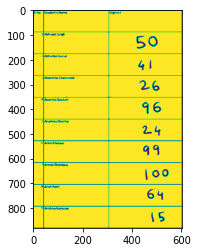

In [23]:
###########-------- STEP 2 - Removing top, bottom, left and right white spaces from photograph ------------#############
pixels=pixels2
row_sums = pixels.sum(axis=1)
column_sums = pixels.sum(axis=0)
# print(pixels.shape)
while average(pixels[0])>240:
  pixels = np.delete(pixels, 0, 0) #delete top white space
while average(pixels[pixels.shape[0]-1])>240:
  pixels = np.delete(pixels, pixels.shape[0]-1, 0) #delete bottom white space
# print(pixels.shape)

start=0
while column_sums[start]>=column_sums[0]:
  start=start+1
pixels=pixels[:,start:] #delete left whitespaces
column_sums = pixels.sum(axis=0)

start=pixels.shape[1]-1
# print(start)
# print(column_sums)
while column_sums[start]>=column_sums[0]:
  start=start-1
pixels=pixels[:,0:start] #delete right whitespaces

# print(pixels[0])
plt.imshow(pixels)
plt.show()
# print(pixels[0])

data = Image.fromarray(pixels)
data = data.convert("L")

# print(type(data))
# data.save('test.jpg')

# print(pixels[0])
###########--------------------------------------------------------------------------------################

In [26]:
########-------STEP 3 - Splitting big image to small images (getting number in each row)-------#########

im=data
no_of_entries = 10
l = [] #list to keep all rows in form of images.

for i in range(0, no_of_entries):
  width, height = im.size
  fiveper = height*9//(no_of_entries*100)
  fiftper = width*15/200
  left = (width/2)+fiftper
  right = width-fiftper
  top = i*int(height//no_of_entries)+fiveper
  bottom = int(height//no_of_entries)*(i+1)-fiveper
  # print(bottom)
  im1 = im.crop((left, top, right, bottom))
  # imhk = im1.save(str(i)+"testcrop.jpg")
  l.append(im1)
# x=0

##########------------------------------------------------------------------------------###########


In [5]:
#################------------- STEP 4 - EXTRACT THE INDIVIDUAL DIGITS FROM IMAGE --------#########
def get_separate_digits(x):
  if x==0:
    return
    global all_digits
  global column_sums
  global pixels

  column_sums = pixels.sum(axis=0)
  start=0
  # print(len(column_sums))
  whiteval=column_sums[0]
  while column_sums[start]>=whiteval:
    start=start+1
    if(start==len(column_sums)):
      return
  pixels=pixels[:,start:] #delete left whitespaces
  column_sums=column_sums[start:]
  end=0
  start=0
  while column_sums[end]<whiteval:
    end=end+1
    if end==len(column_sums)-1:
      break
  # print(pixels[:,start:end])
  all_digits.append(pixels[:,start:end])  
  
  pixels=pixels[:,end:]
  
  column_sums=column_sums[end:]
  get_separate_digits(len(column_sums))

def remove_space_top_bottom(i):
  row_sums = i.sum(axis=1)
  column_sums = i.sum(axis=0)
  # print(pixels.shape)
  while average(i[0])>240:
    i = np.delete(i, 0, 0) #delete top white space
  while average(i[i.shape[0]-1])>240:
    i = np.delete(i, i.shape[0]-1, 0) #delete bottom white space
#   print(pixels.shape)
  return i

In [6]:
###########----------- Model creation starting -----------------################
!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images=mnist.train_images()
train_labels=mnist.train_labels()

test_images=mnist.test_images()
test_labels=mnist.test_labels()

In [ ]:
train_images=(train_images/255)-0.5
test_images=(test_images/255)-0.5

train_images=train_images.reshape((-1,784))
test_images=test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

In [9]:
#model 
model = Sequential()
model.add(Dense(64,activation = 'relu', input_dim=784))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# print(train_images.shape)
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=32
)

In [ ]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)
############------------MDOEL READY ---------------######################

In [13]:
######------------STEP 6 - PREDICT NUMBER FROM PROCESSED DIGIT ----------########
from PIL import Image
from pylab import *
import PIL.ImageOps   

def predict(i):

  img = i
 
  img = PIL.ImageOps.invert(img)

  img = img.resize((28,28))
  # print(img.size)
  img=array(img)

  if(img.size>784):
    img=img[0:28,0:28,0:1]
  img=img.reshape((-1,784))
  img=(img-np.min(img))
  img=img/np.max(img)
  img=img*255
  img=np.where(img<100, 0, img)
  img=np.where(img>=100, 255, img)
  # print(np.max(img))

  pixels=img.reshape((28,28))
  plt.imshow(pixels)
  plt.show()

  predictions = model.predict(img)
  # print(np.argmax(predictions, axis=1))
  return int(np.argmax(predictions, axis=1))
  # return predictions[0]
  # return predictions[0]
  # print(pixels)
  # data = Image.fromarray(pixels)
  # data = data.convert("L")
  # print(type(data))
  # data.save('testerimg41.jpg')

  ######---------NUMBER RETURNED---------#################

In [14]:
###########-----------COMBINE ALL FUNCTIONS TO GET VALUE FROM STEP 3 TO STEP 6. TAKES ROW IMAGE AS INPUT AND RETURNS THE LIST CONTAINING DIGITS IN THAT ROW -------##########
all_digits=[]
pixels
column_sums

def get_value(imgc):
  global all_digits
  all_digits=[]
  global pixels
  global column_sums
  height=imgc.size[1]
  width=imgc.size[0]
  mul=width*height
  imgc = imgc.resize((width,height))
  imgc=array(imgc)

  # print(img.shape)
  # print(img.size)
  # print(imgc.size)
  if(imgc.size>mul):
    imgc=imgc[0:height,0:width,0:1]
  # print(img.shape)
  # print(img.size)
  imgc=imgc.reshape((-1,mul))
  imgc=(imgc-np.min(imgc))
  imgc=imgc/np.max(imgc)
  imgc=imgc*255
  imgc=np.where(imgc<200, 0, imgc)
  imgc=np.where(imgc>=200, 255, imgc)
  pixels=imgc.reshape((height,width))
  plt.imshow(pixels)
  plt.show()
  # print(pixels)
  pixels2=pixels


  pixels=pixels2
  column_sums = pixels.sum(axis=0)
  column_sums_orig=column_sums
  # print(column_sums)
  lastleft=0
  # pix=get_digit() 
  # print(pix)
  # pix=pix.reshape((30,))
  # pix.shape
  # plt.imshow(pix)
  # plt.show()
  # print(lastleft)
  # print(column_sums)

  
  all_digits=[]

  # print(pixels.shape)
  # print(len(column_sums))
  get_separate_digits(len(column_sums))

  # print(all_digits)
  for i in all_digits:
    all_digits[all_digits.index(i)]=remove_space_top_bottom(i)
    # print(i)
    # plt.imshow(i)
    # plt.show()
    # print(pixels)
  # for i in all_digits:
  #   # all_digits[all_digits.index(i)]=remove_space_top_bottom(i)
  #   # print(i)
    
  #   plt.imshow(i)
  #   plt.show()
  # print(len(all_digits))


  #####---------- STEP 5 - adding border to numbers to bring in dimensions similar to MNIST -------------######
  alldigitsarray=[]
  for i in all_digits:
    
    # print(i.shape)
    w=i.shape[1]
    h=i.shape[0]
    if np.average(i)==0 and w>h:
      all_digits.remove(i)
      continue
    # if h==1 or w==1:
    #   i=[i]
    # print(i.shape)
    # print(w,h)
    # plt.imshow(i)
    # plt.show()
    h2=18
    w2=h2*w/h
    top=int(ceil(((28-h2)*h)/(2*h2)))
    left=  int(ceil(((28-w2)*w)/(2*w2)))
    # print(top,left)
  
    topwhite = [[255]*w]*top
    itemp=i
    i = np.append(topwhite, i, axis=0)
    i = np.append(i, topwhite, axis=0)

    leftwhite=[[255]*left]*(h+(2*top))
    i = np.append(leftwhite, i, axis=1)
    i = np.append(i, leftwhite, axis=1)
  
    all_digits[all_digits.index(itemp)]=i
    # plt.imshow(i)
    # plt.show()
    # print(i)
    # data = Image.fromarray(i)
    # data = data.convert("L")
    # print(data)
    # data.save('test'+str(counter)+'.jpg')
    # # counter=counter+1
    data = Image.fromarray(i)
    data = data.convert("L")
    
    alldigitsarray.append(predict(data))
  return alldigitsarray

########-------- LIST CONTAINING DIGITS IN THE ROW IMAGE RETURNED---------##########



    # tempimg.save(str(height)+".jpg");



# imgxx=Image.open('10.jpeg')
# get_value(imgxx)

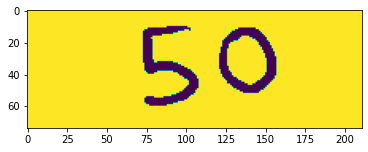

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


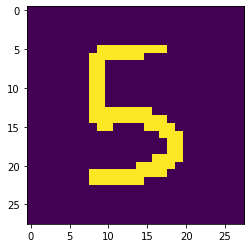

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


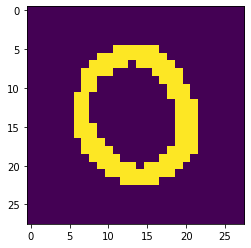

[5, 0]


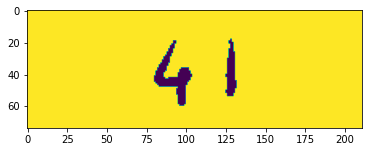

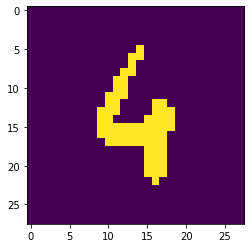

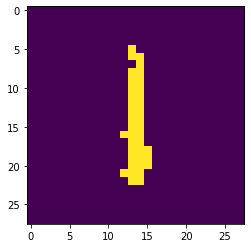

[4, 1]


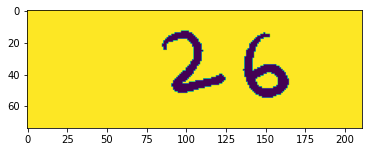

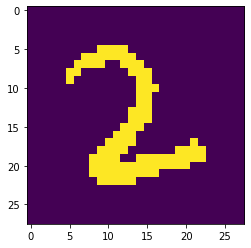

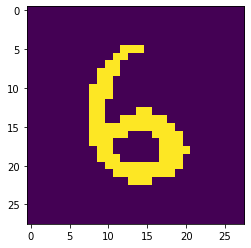

[2, 6]


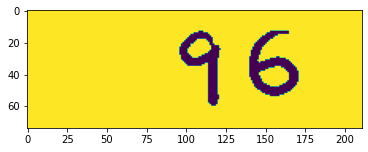

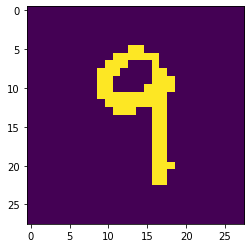

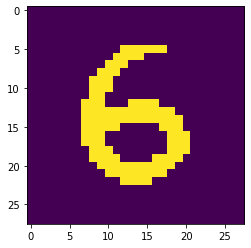

[9, 6]


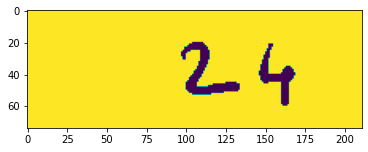

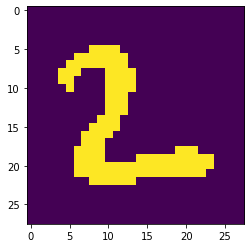

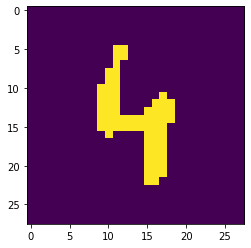

[2, 4]


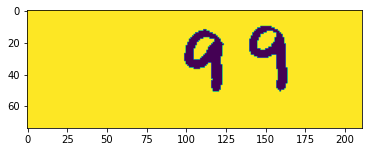

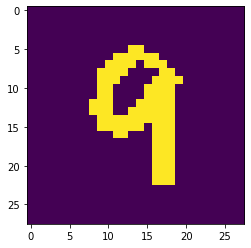

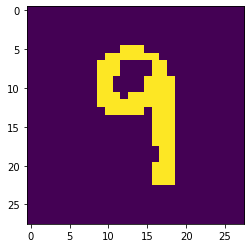

[9, 9]


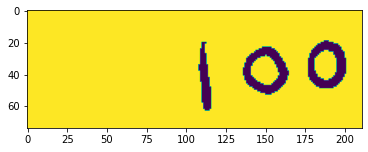

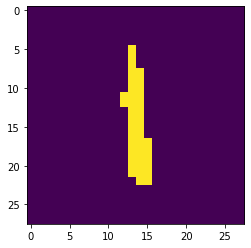

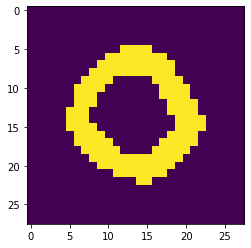

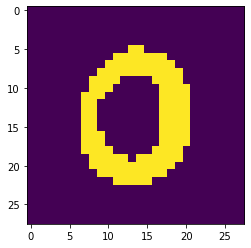

[1, 0, 0]


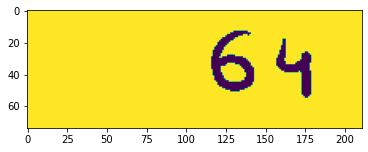

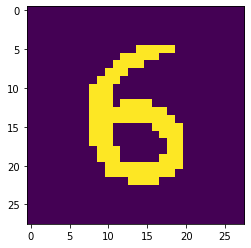

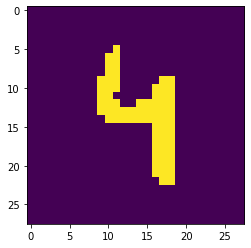

[6, 4]


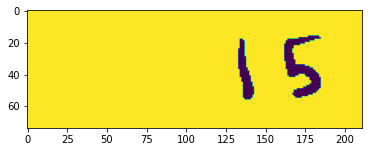

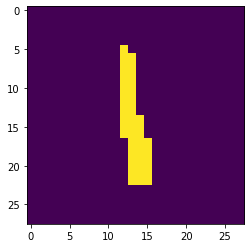

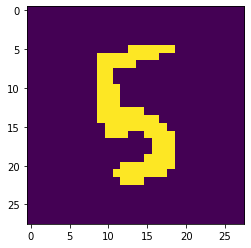

[1, 5]
[50, 41, 26, 96, 24, 99, 100, 64, 15]


In [27]:
###########---------------STEP 7 - RUNNING ALL STEPS FOR EACH ROW TO GET MARKS, ALL MARKS STORED IN LIST 'marks' --------------#########
marks=[]
x=0
for i in l:
  if x!=0:
    temparr=get_value(i)
    mark=0
    print(temparr)
    for digitt in temparr:
      mark=mark*10
      mark=mark+int(digitt)
    marks.append(mark)
    # ikj=i.save("new\ "+str(x)+".jpg")
  
  x=x+1
print(marks)
# get_value(l[1])
#########---------------------------------------------------------###############

In [28]:
########------------ STEP 8 - SAVE THE MARKS IN EXCEL ----------##########
import pandas as pd

df = pd.read_excel (r'names.xlsx')
height=df.shape[0]
while len(marks)<height:
  marks.append(0)
if len(marks)>height:
  marks=marks[:height]
df['marks']=marks
df
df.to_excel('updated.xlsx',index = False)
# df.to_excel(r'Path to store the exported excel file\File Name.xlsx', sheet_name='Your sheet name', index = False)
